# Results

We will present the results of the metrics in this notebook.

In [1]:
%matplotlib inline

from results_preparation import *

## Sum of the ROI divided by the Total sum

In [2]:
folder = "../../XAI_metrics/metrics/"

### Saliency Maps

#### All Values

Mean value of initial beat: 25.02 +- 18.23%
Mean value of final beat: 30.34 +- 9.17%


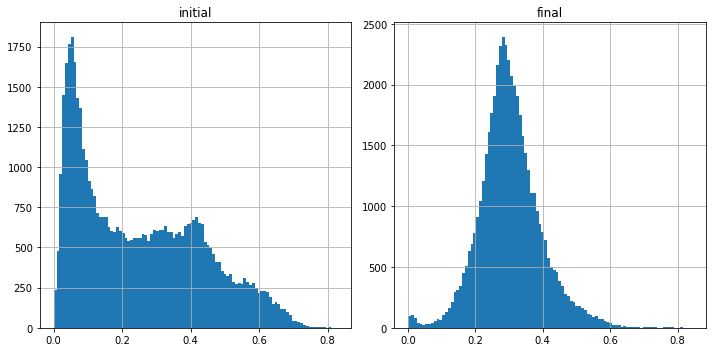

In [3]:
present_values(folder, "saliency")

#### All But 0's

In [4]:
present_values(folder,"saliency", 0)

#### Correct Classification

In [5]:
present(folder, "saliency", ['pred_results', 'ok'], but_zeros=False)

#### Incorrect Classification

In [6]:
present(folder, "saliency", ['pred_results', 'wrong'], but_zeros=False)

#### Normal Label

In [7]:
present(folder, "saliency", ['true_labels', 'normal'], but_zeros=False)

#### Abnormal Label

In [8]:
present(folder,"saliency", ['true_labels', 'abnormal'], but_zeros=False)

# Accuracy classification: 
* **final**: 0.9366
* **mid**: 0.9341
* **initial**: 0.9172

# Attention Maps Comparison

In [9]:
#folder = '../../data/attribution_maps/' # RUI
folder_maps = "/mnt/Media/bernardo/attribution_maps_revisited/"

In [10]:
maps_comparison("final", "saliency_map", "abnormal", folder_maps)